### 1. Importando as bibliotecas
Todas as bibliotecas necessárias para o projeto são importadas.
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
``` 
### 2. Carregando o conjunto de dados
O conjunto de dados é carregado a partir de um arquivo CSV.
```python
data = pd.read_csv('data.csv')
print(data.head())
```

In [2]:
# Análise da base Adult (Census Income)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import os

dataset = "adult.csv"
df = pd.read_csv(dataset)
df.head(60)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


### 3. Verificando valores ausentes
Verificamos se há valores ausentes no conjunto de dados, se houver, eles serão tratados de "?" para NaN.

In [3]:
for col in df.columns:
    if "?" in df[col].unique():
        print(col, df[col].value_counts()["?"])

df.replace("?", np.nan, inplace=True)


workclass 2799
occupation 2809
native-country 857


### 4. Verificando quantos valores ausentes existem
```python
print(data.isnull().sum())
```

In [6]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

### 5. Tratando valores ausentes pela média (numéricos) e moda (categóricos)
Os valores ausentes são tratados substituindo-os pela média (para colunas numéricas) ou pela moda (para colunas categóricas).

### 6. Verificando novamente valores ausentes
Pecebe-se que não há mais valores ausentes no conjunto de dados.

In [7]:
for col in df.columns:
    if df[col].isnull().sum() > 0:  # só colunas com NaN
        if df[col].dtype in ["int64", "float64"]:  
            # Quantitativa → média
            df[col].fillna(df[col].mean(), inplace=True)
        else:  
            # Qualitativa → moda
            df[col].fillna(df[col].mode()[0], inplace=True)

# Conferir resultado
print(df.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


/tmp/ipykernel_62017/1886933834.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


### 7. Descrição estatística do conjunto de dados
Uma descrição estatística do conjunto de dados é exibida para entender melhor suas características.

In [9]:
desc = df.describe().T
desc['missing'] = df.isnull().sum()
desc['unique'] = df.nunique()
desc = desc[['count', 'missing', 'unique', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
desc


,count,missing,unique,mean,std,min,25%,50%,75%,max
age,48842.0,0,74,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,0,28523,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,0,16,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,0,123,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,0,99,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,0,96,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


### 8. Retirando Outliers
Outliers são removidos utilizando o método do desvio interquartil (IQR). Eles são identificados e removidos para melhorar a qualidade dos dados.

In [10]:
def retirar_outliers(dataframe, col_name):
    Q1 = dataframe[col_name].quantile(0.25)
    Q3 = dataframe[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filtrar os dados dentro dos limites
    filtered_df = dataframe[(dataframe[col_name] >= lower_bound) & (dataframe[col_name] <= upper_bound)]
    return filtered_df

df = retirar_outliers(df, 'age')
df = retirar_outliers(df, 'fnlwgt')
df = retirar_outliers(df, 'capital-gain')
df = retirar_outliers(df, 'capital-loss')
df = retirar_outliers(df, 'hours-per-week')

### 9. Descrição estatística do conjunto de dados
Uma descrição estatística do conjunto de dados é exibida para entender melhor suas características.

In [11]:
desc = df.describe().T
desc['missing'] = df.isnull().sum()
desc['unique'] = df.nunique()
desc = desc[['count', 'missing', 'unique', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
desc


,count,missing,unique,mean,std,min,25%,50%,75%,max
age,29656.0,0,62,38.295286,12.221230,17.0,28.00,37.0,47.00,78.0
fnlwgt,29656.0,0,19487,181264.248685,87356.608986,13769.0,117220.75,177087.0,230998.75,418020.0
educational-num,29656.0,0,16,9.989850,2.489715,1.0,9.00,10.0,12.00,16.0
capital-gain,29656.0,0,1,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
capital-loss,29656.0,0,1,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
hours-per-week,29656.0,0,20,41.443418,3.946545,33.0,40.00,40.0,40.00,52.0


### 10. Seção de Resultados
Nessa seção, apresentamos os resultados da análise exploratória dos dados (EDA) e as principais conclusões obtidas a partir do conjunto de dados Adult.

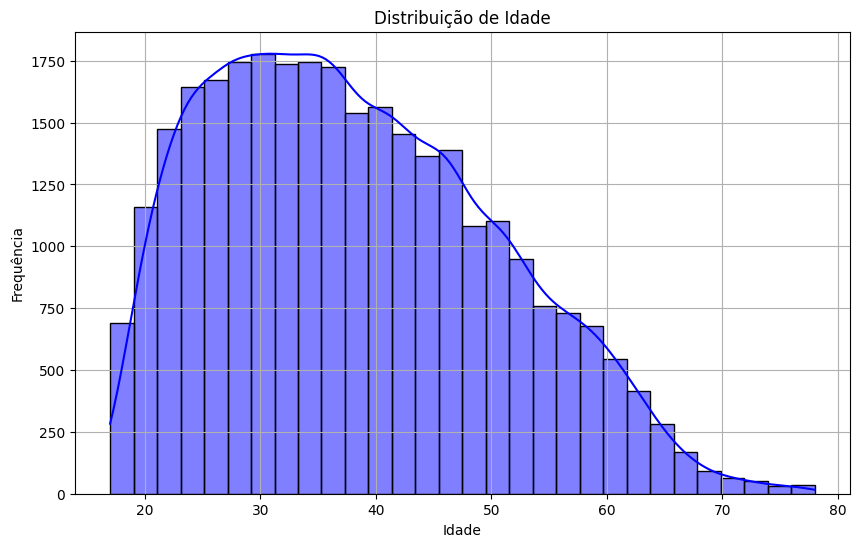

In [12]:
# Histograma de Idade
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid()
plt.show()

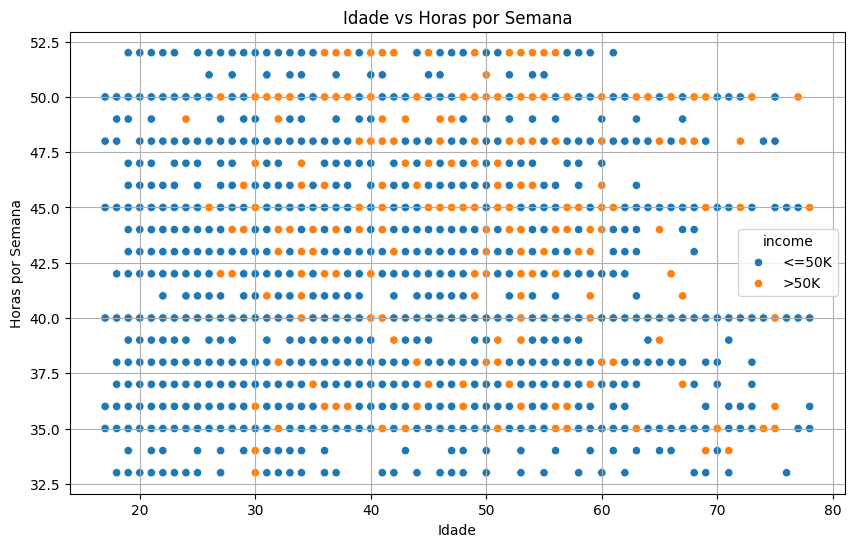

In [49]:
# Dispersão: Idade vs Horas por semana
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='hours-per-week', hue='income', data=df)
plt.title('Idade vs Horas por Semana')
plt.xlabel('Idade')
plt.ylabel('Horas por Semana')
plt.grid()
plt.show()

<Figure size 1200x600 with 0 Axes>

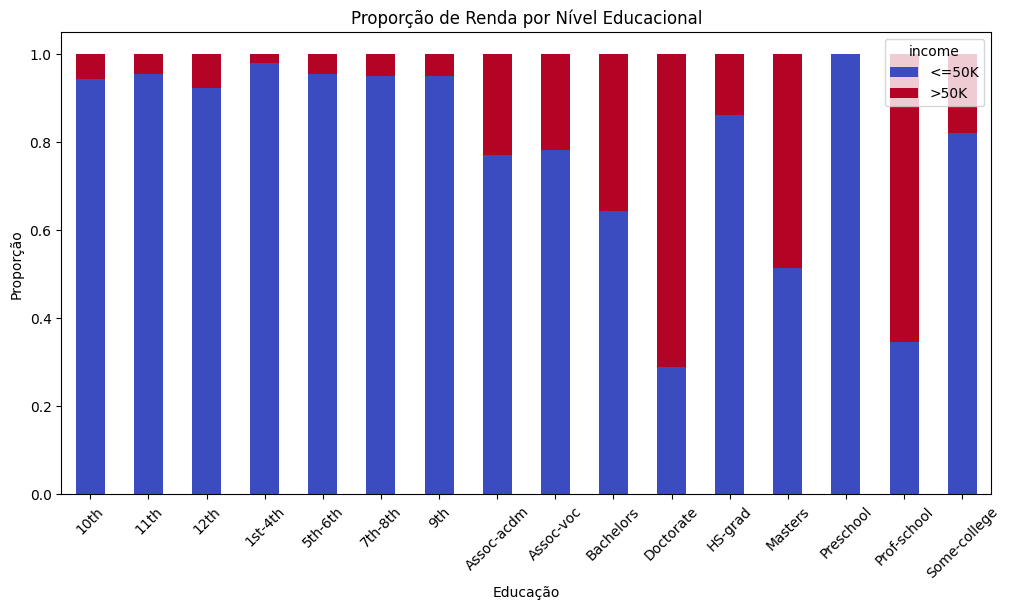

In [50]:
plt.figure(figsize=(12, 6))
edu_income = pd.crosstab(df['education'], df['income'], normalize='index')
edu_income.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Proporção de Renda por Nível Educacional')
plt.xlabel('Educação')
plt.ylabel('Proporção')
plt.xticks(rotation=45)
plt.show()




/tmp/ipykernel_6291/1007600631.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='education', y='hours-per-week', hue='income', data=df, ci=None)


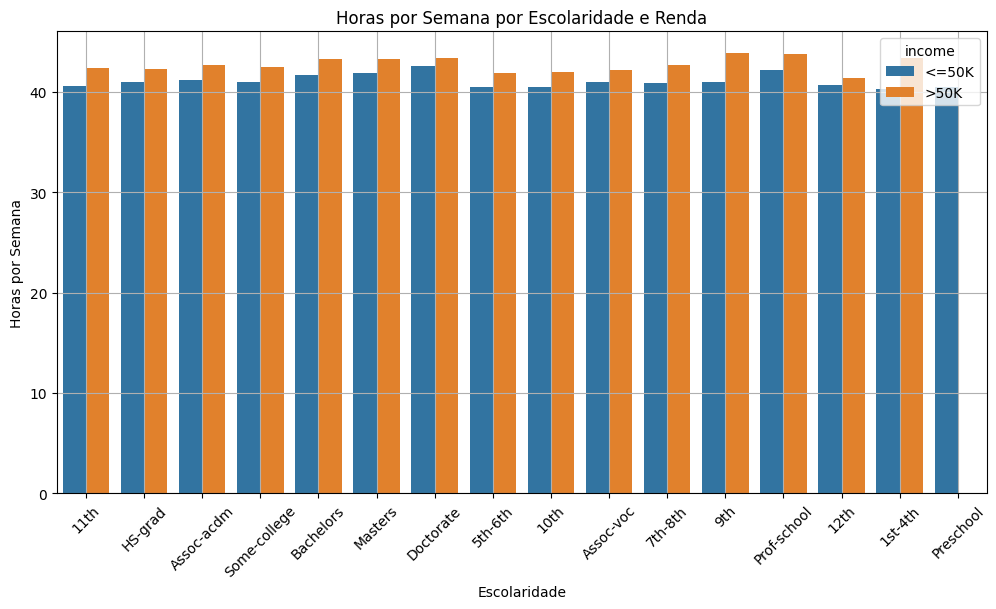

In [51]:
# Renda Média por escolaridade
plt.figure(figsize=(12, 6))
sns.barplot(x='education', y='hours-per-week', hue='income', data=df, ci=None)
plt.title('Horas por Semana por Escolaridade e Renda')
plt.xlabel('Escolaridade')
plt.ylabel('Horas por Semana')
plt.xticks(rotation=45)
plt.grid()
plt.show()

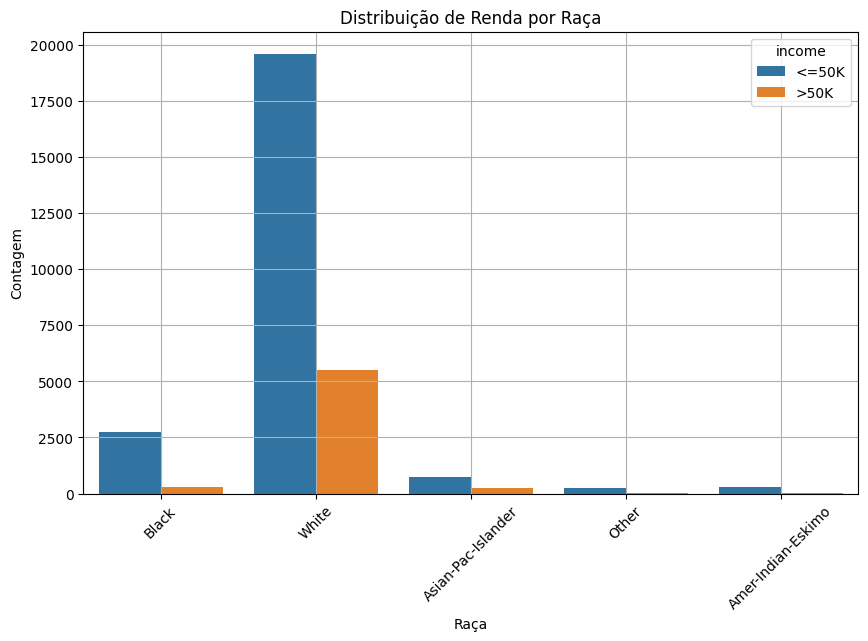

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='income', data=df)
plt.title('Distribuição de Renda por Raça')
plt.xlabel('Raça')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.grid()
plt.show()


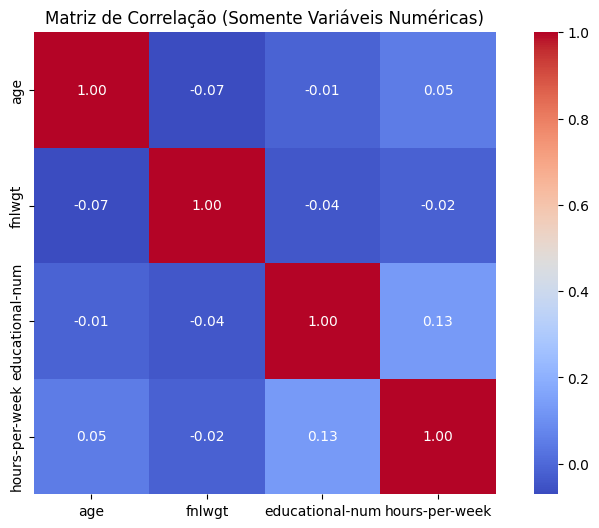

In [15]:
correlation_matrix = numeric_df.corr()

# Remover colunas/linhas que são todas NaN
correlation_matrix = correlation_matrix.dropna(axis=0, how="all").dropna(axis=1, how="all")

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlação (Somente Variáveis Numéricas)")
plt.show()
